![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [23]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB
None
RangeIndex(start=0, stop=185715, step=1)
              DR_NO       Vict Age
count  1.857150e+05  185715.000000
mean   2.255781e+08      39.999257
std    5.017438e+06      15.450227
min    2.009072e+08       2.000000
25%    2.21010

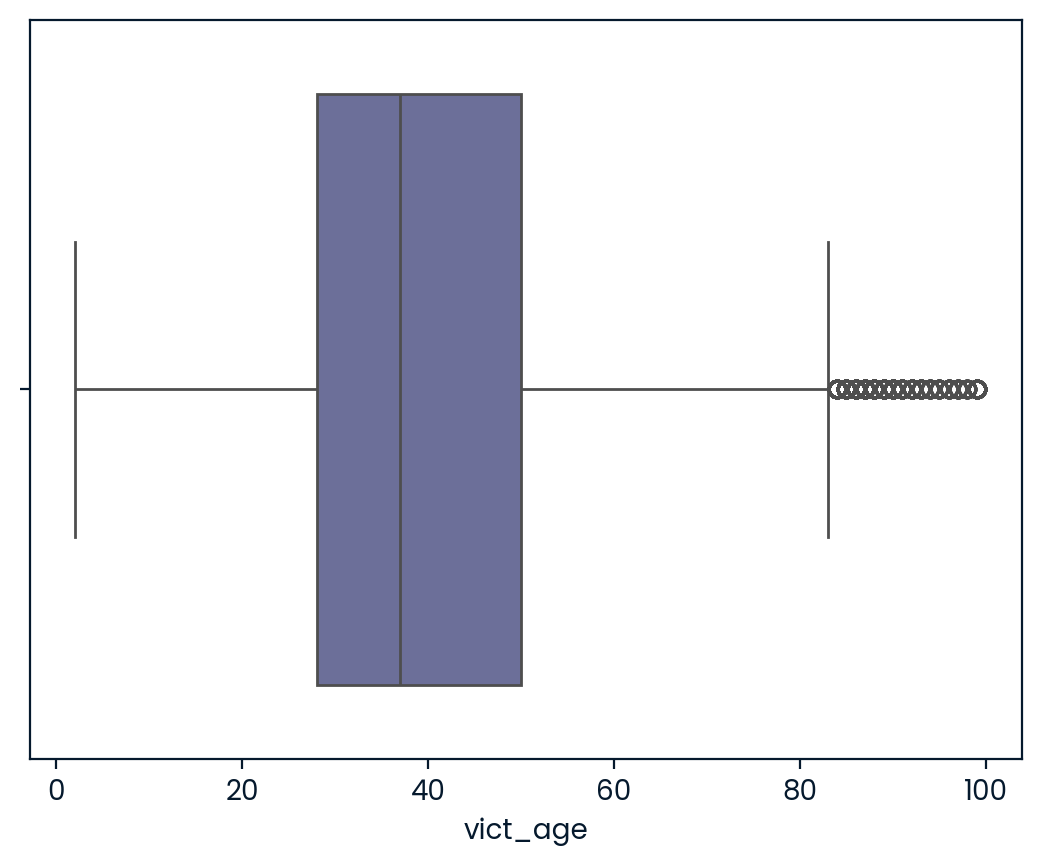

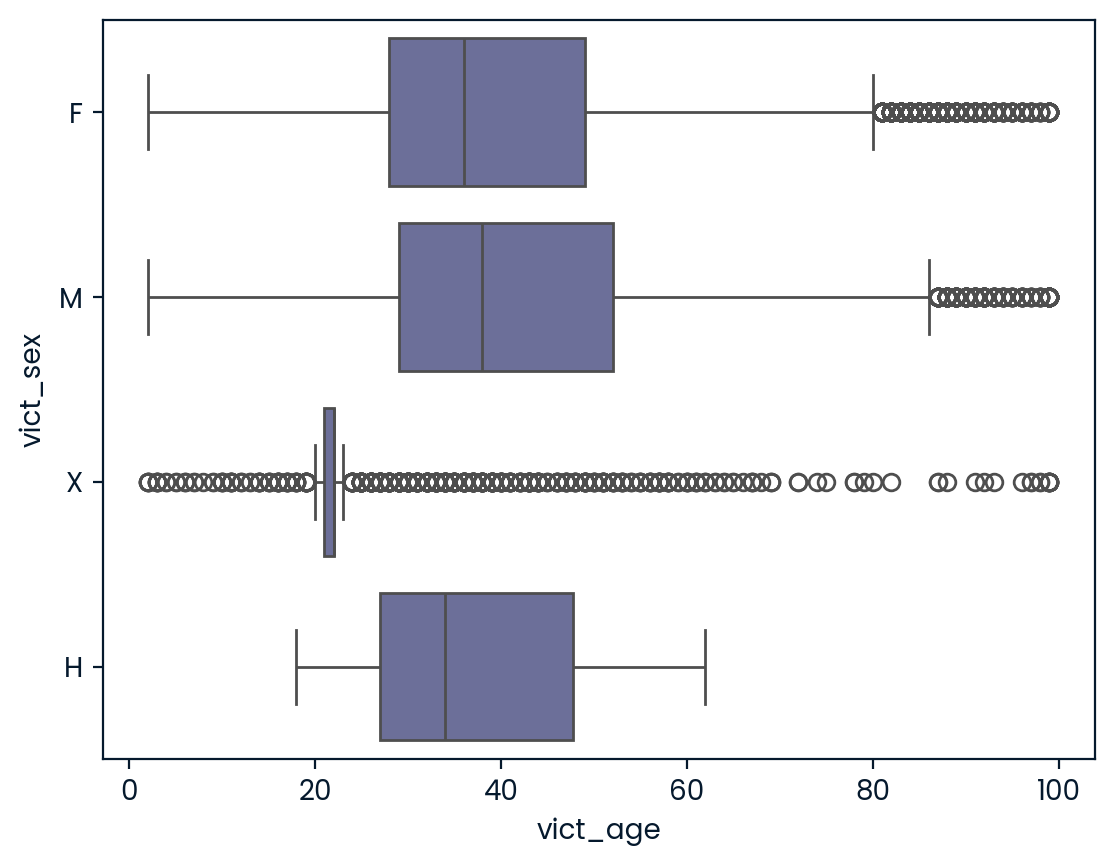

object
string
   time_occ_DateTime time_occ
0                 11     1110
1                 16     1620
2                 12     1200
3                  6     0635
4                  9     0900
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
21     8701
22     8531
13     8474
10     8440
8      7523
23     7419
9      7092
1      5836
6      5621
7      5403
2      4726
3      3943
4      3238
5      3171
Name: time_occ_DateTime, dtype: int64
12 12
            dr_no  ... time_occ_DateTime
8       231207476  ...                 0
10      221711184  ...                 1
30      221314362  ...                 0
33      231307252  ...                23
36      221614254  ...                 0
...           ...  ...               ...
185687  231306158  ...                22
185695  231212224  ...                23
185700  231300825  ...                22
185701  230908346  ...                22
185704  231710498  ... 

In [24]:
# Start coding here
# Use as many cells as you need
print(crimes.info())
print(crimes.index)
print(crimes.describe())
print(crimes.dtypes)
print(crimes["Crm Cd Desc"].value_counts())
print(crimes.columns)
print(crimes.isnull())

# Unify names of the columns - lower case and underscore
crimes.columns = crimes.columns.str.lower()
print(crimes.columns)
crimes.columns = crimes.columns.str.replace(" ", "_")
print(crimes.columns)



# Validating numerical data
crimes.select_dtypes("number").head()
print(crimes[['dr_no', 'vict_age']].min())
print(crimes[['dr_no', 'vict_age']].max())
sns.boxplot(data=crimes, x="vict_age")
plt.show()
sns.boxplot(data=crimes, x="vict_age", y="vict_sex")
plt.show()

# Extract hour from "time_occ"
print(crimes["time_occ"].dtypes)
crimes["time_occ"] = crimes["time_occ"].astype("string")
print(crimes["time_occ"].dtypes)

crimes['time_occ_DateTime'] = pd.to_datetime(crimes['time_occ'], format = "%H%M").dt.hour
print(crimes[['time_occ_DateTime', 'time_occ']].head())

# Count values in crimes['time_occ_DateTime']
print(crimes['time_occ_DateTime'].value_counts())

# Which hour has the highest frequency of crimes, store as an integer
pcr_series = crimes['time_occ_DateTime'].value_counts().sort_values(ascending = False)
pcr = pcr_series.keys()[0]
peak_crime_hour = 12
print(peak_crime_hour, pcr)

# Sort crimes comitted between 10pm and 3:59am
crimes["time_occ"] = crimes["time_occ"].astype("int")
night_crimes = crimes[(crimes["time_occ"] >= 2200) | (crimes["time_occ"] <= 359)]
print(night_crimes)


# Area with largest frequency of night crimes
area_largest_night_crime = night_crimes.groupby("area_name").count().sort_values(by="time_occ_DateTime", ascending=False)
print(area_largest_night_crime)

area_largest_night_crime_2 = night_crimes.groupby("area_name").count().max()
print(area_largest_night_crime_2)

peak_night_crime_location = "Central"
print(peak_night_crime_location)
print("peak_night_crime_location is " + peak_night_crime_location)



#Different age groups of Victims
crimes.loc[crimes["vict_age"] <= 17, "vict_age_group"] = "0-17"
crimes.loc[crimes["vict_age"].between(18, 25), "vict_age_group"] = "18-25"
crimes.loc[crimes["vict_age"].between(26, 34), "vict_age_group"] = "26-34"
crimes.loc[crimes["vict_age"].between(35, 44), "vict_age_group"] = "35-44"
crimes.loc[crimes["vict_age"].between(45, 54), "vict_age_group"] = "45-54"
crimes.loc[crimes["vict_age"].between(55, 64), "vict_age_group"] = "55-64"
crimes.loc[crimes["vict_age"] >= 65, "vict_age_group"] = "65+"

print(crimes[["vict_age", "vict_age_group"]])

#Number of crimes comitted against victims of different age groups
no_crimes_vict_age_group = crimes.groupby(crimes["vict_age_group"]).count()
print(no_crimes_vict_age_group)

#Save as a panda series called victim_ages
vict_ages = {"0-17":4528, "18-25":28291, "26-34":47470, "35-44":42157, "45-54":28353, "55-64":20169, "65+":14747}

victim_ages = pd.Series(vict_ages)
print(victim_ages)